## Project Description

**Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

**This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

**Explore and analyze the data to discover important factors that govern the bookings.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# plt.style.use('dark_background')
import plotly.offline as pyo
import plotly.graph_objs as go

In [2]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
data = pd.read_csv("Hotel Bookings.csv")



In [4]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Data description

Hotel:Hotel (H1 = Resort Hotel or H2 = City Hotel)

is_canceled:Value indicating if the booking was canceled (1) or not (0)

lead_time:Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year:Year of arrival date

arrival_date_month:Month of arrival date

arrival_date_week_number:Week number of year for arrival date

rrival_date_day_of_month:Day of arrival date

stays_in_weekend_nights:Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights:Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults:Number of adults

children:Number of children

babies:Number of babies

meal:BB – Bed & BreakfastHB – only two meals including breakfast meal* FB – breakfast, lunch, and dinner text

country:Country from they belong

market_segment:TA: Travel agentsTO: Tour operators

is_repeated_guest:is guest repeated

previous_cancellations:Have they canceled previous bookings

previous_bookings_not_canceled:

reserved_room_type:Type of room they reserved

assigned_room_type:Type of room they assigned

booking_changes:booking changed or not

deposit_type:deposit type they preferred

agent: ID of the travel agency that made the booking

company:

days_in_waiting_list:

customer_type:

adr:Average daily rate

required_car_parking_spaces:Spaces required for car parking

total_of_special_requests:total number of special requests

reservation_status:Status of reservation is it canceled,waiting,confirmed

reservation_status_date:date of reservationm

### Information about attribute data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Data preprocessing
**here we will see about missing values in each variable and deal with them**

## A) handel the missing value

In [6]:
data.isna().sum().sort_values(ascending=False)[:6]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

In [7]:
(data.isnull().mean()*100).sort_values(ascending=False)

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

**From above analysis we see that compyny has 94% missing values and agent valriable 13% data is missing** 

In [8]:
data["company"].fillna(0,inplace=True)
data["agent"].fillna(0,inplace=True)
data["country"].fillna("other",inplace=True)
data["children"].fillna(0,inplace=True)

In [9]:
data.isna().sum().sort_values(ascending=False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

***Since, company and agent columns have somany number of missing data . There may be some cases when customer didnt booked hotel via any agent or via any company. So in that case values can be null under these columns.  We will replace null values by 0 in these columns***

#### Feature trasformation

In [10]:
data['total_people']=data['stays_in_weekend_nights']+data['stays_in_week_nights']

In [11]:
data=data.rename(columns={'total_people':'total_people_stay'})

In [12]:
data['total_people']=data['adults']+data['children']+data['babies']

In [13]:
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


##  EDA (exploratory data analysis)

## univariate analysis

##  how many people does cancel booking out off all booking?

<AxesSubplot:ylabel='is_canceled'>

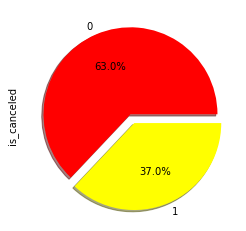

In [14]:
color=['red','yellow']
data['is_canceled'].value_counts().plot(kind='pie',autopct='%0.1f%%',explode=[0.01,0.1],shadow=True,colors=color)

**Here we can see that 37% people canceled booking**

## ii) how many people get repeated

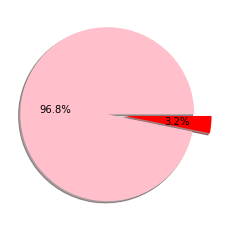

In [15]:
color=['pink','red']
plt.pie(data["is_repeated_guest"].value_counts(),autopct='%0.1f%%',explode=[0.1,0.1],shadow=True,colors=color)
plt.show()

### Repeated guests are very few which only 3.9 %.

##  Which type of hotel is mostly prefered by the guests?

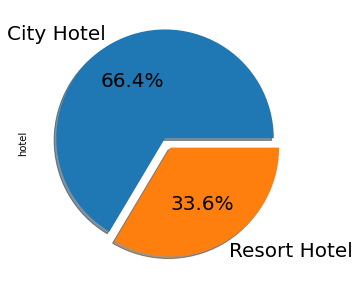

In [16]:
data['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(8,5),fontsize=20)
plt.show()

**Here we can say that 66% of city hotels are present or most people prefer to stay in city hotel**

###  Which agent makes most no. of bookings?

In [17]:
d1=data['agent'].value_counts().reset_index().rename(columns={'index':'agent','agent':'number_of_booking'})
d1.sort_values(by='number_of_booking',ascending=False)
d1.drop(d1[d1['agent']==0].index)
d1=d1[:10]
d1

,agent,number_of_booking
0,9.0,31961
1,0.0,16340
2,240.0,13922
3,1.0,7191
4,14.0,3640
5,7.0,3539
6,6.0,3290
7,250.0,2870
8,241.0,1721
9,28.0,1666


<AxesSubplot:xlabel='agent', ylabel='number_of_booking'>

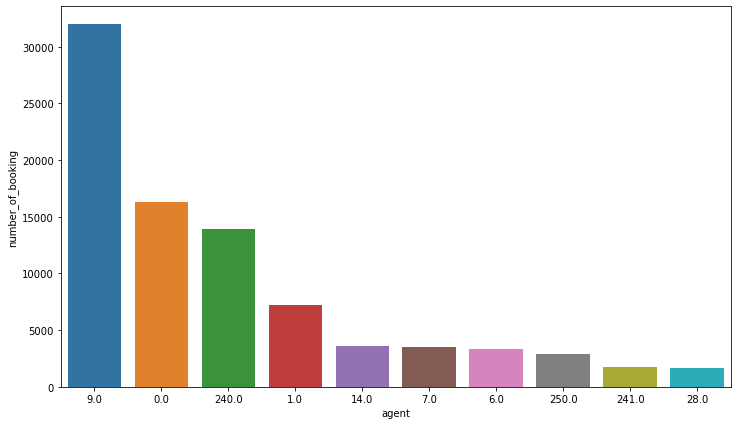

In [18]:
plt.figure(figsize=(12,7))
sns.barplot(x='agent',y='number_of_booking',data=d1,order=d1.sort_values(by='number_of_booking',ascending=False).agent)

### agent 9 has made most numbers of booking

##  Which room type is in most demand ?

In [19]:
data['assigned_room_type'].value_counts()

A    74053
D    25322
E     7806
F     3751
G     2553
C     2375
B     2163
H      712
I      363
K      279
P       12
L        1
Name: assigned_room_type, dtype: int64

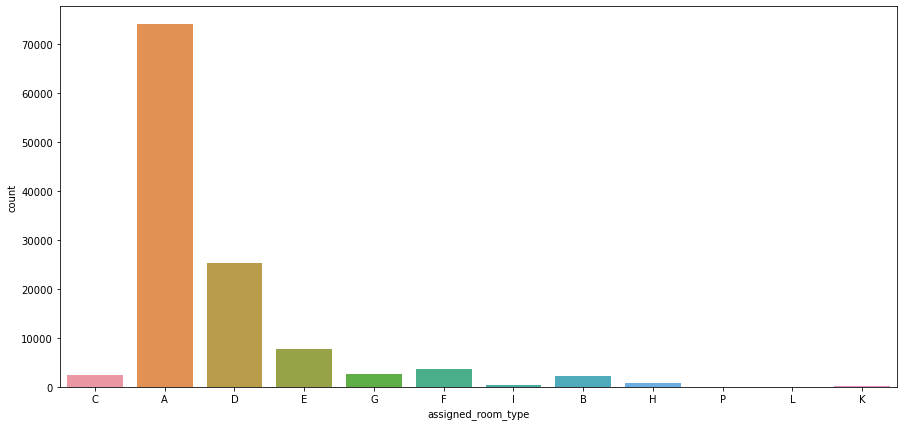

In [20]:
plt.figure(figsize=(15,7))
sns.countplot(x=data['assigned_room_type'],data=data)
plt.show()

**From above graps we can say room type A most in demand**

### What is the percentage distribution of "Customer Type"?

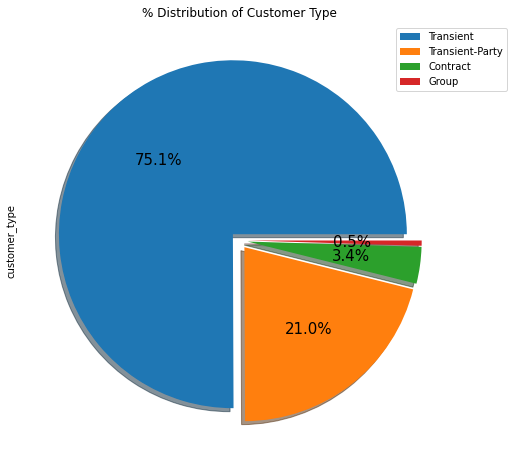

In [21]:
data['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)
labels=data['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

**1. Contract**

when the booking has an allotment or other type of contract associated to it

**2. Group**

when the booking is associated to a group

**3. Transient**

when the booking is not part of a group or contract, and is not associated to other transient booking

**4. Transient-party**

when the booking is transient, but is associated to at least other transient booking

**Observation:** 

Transient customer type is more which is 75.1 %. percentage of Booking associated by the Group is vey low.

### What is the percentage distribution of required_car_parking_spaces?

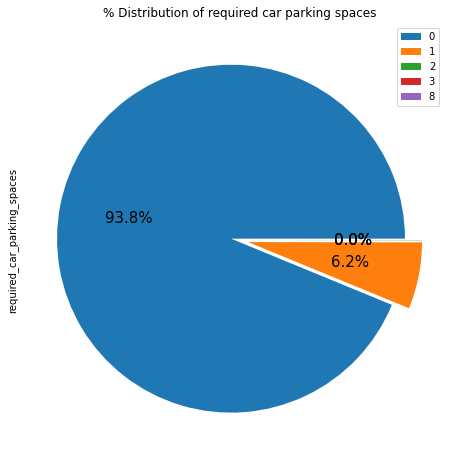

In [22]:
data['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=data['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

### 93.6 % guests did not required the parking space. only 6.3 % guests required only 1 parking space

### What is the percentage of booking changes made by the customer.?

Text(0, 0.5, 'Percentage(%)')

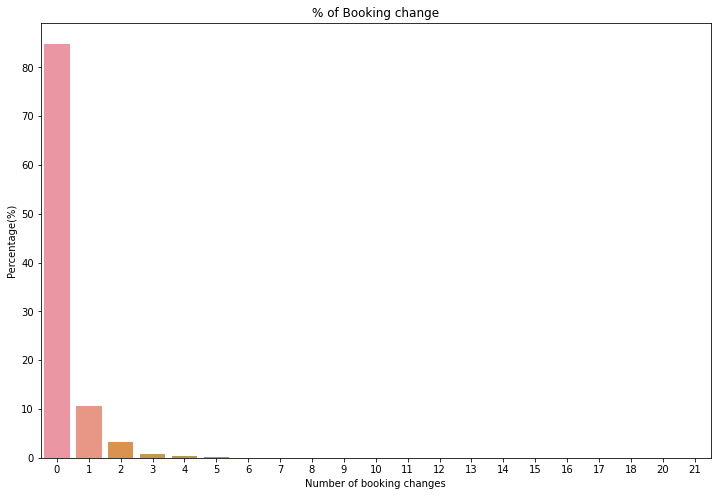

In [23]:
booking_changes=data['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes['number_booking_changes'],y=booking_changes['Counts']*100/data.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

#### Almost 82% of the bookings were not changed by guests.

### From which country the most guests are coming?

In [24]:
country_guest=data['country'].value_counts().reset_index(name='num_of_guests')
country_guest=country_guest.rename(columns={'index':'country'})[:10]
country_guest

,country,num_of_guests
0,PRT,48590
1,GBR,12129
2,FRA,10415
3,ESP,8568
4,DEU,7287
5,ITA,3766
6,IRL,3375
7,BEL,2342
8,BRA,2224
9,NLD,2104


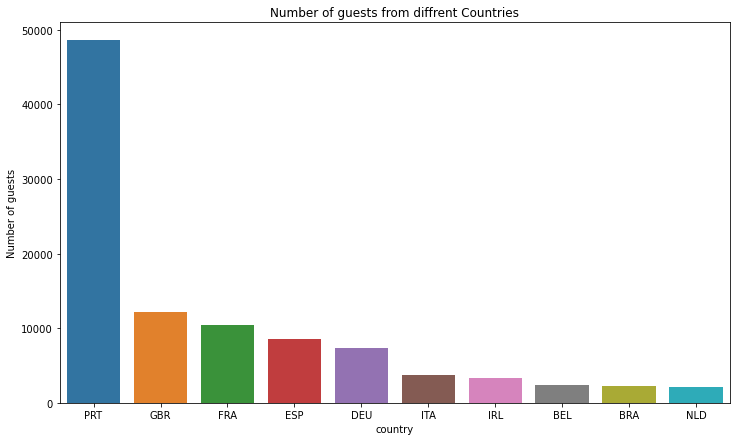

In [25]:
plt.figure(figsize=(12,7))
sns.barplot(x=country_guest.country,y=country_guest.num_of_guests,data=country_guest.head(10))
plt.ylabel('Number of guests')
plt.title("Number of guests from diffrent Countries")
plt.show()

<AxesSubplot:ylabel='distribution_channel'>

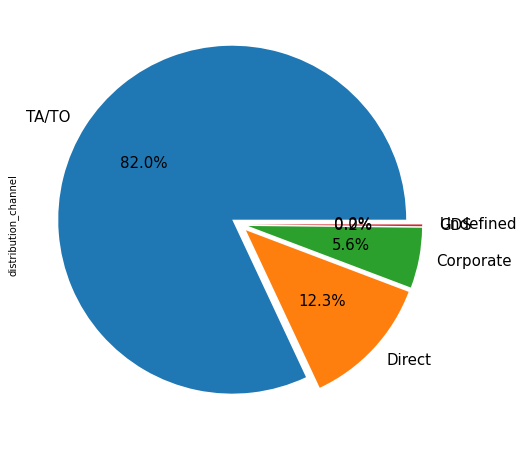

In [26]:
labels=data['distribution_channel'].value_counts().index
distribution=data['distribution_channel'].value_counts()
distribution.plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=labels)

### food prefer by guest

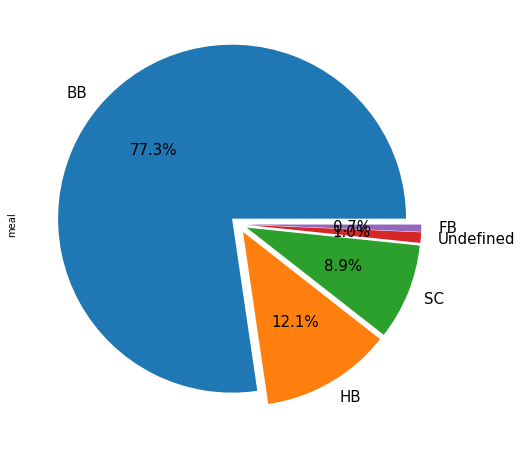

In [27]:
label=data['meal'].value_counts().index
data['meal'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=label)
plt.show()

BB - (Bed and Breakfast)

HB- (Half Board)

FB- (Full Board)

SC- (Self Catering) 

### Observation 
**So the most preferred meal type by the guests is BB( Bed and Breakfast)** 

**HB- (Half Board) 12.1 and SC- (Self Catering)8.9 are preferred.**

In [28]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_people_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2.0


## Bivariate and Multivariate Analysis

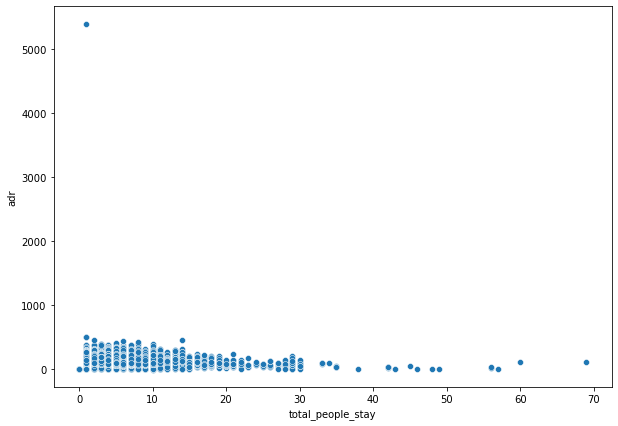

In [29]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='total_people_stay',y='adr',data=data)
plt.show()

**from above scatter plot we will found out some outhliers the doesnt make sence**

In [30]:
data.drop(data[data['adr']>500].index,inplace=True)

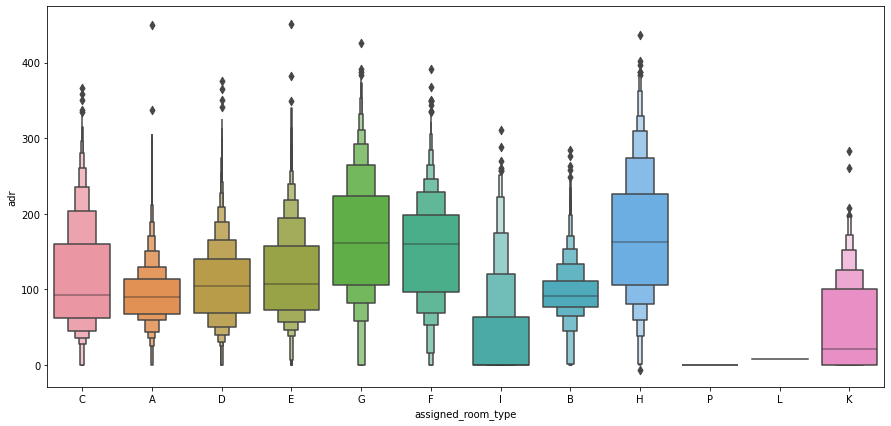

In [31]:
plt.figure(figsize=(15,7))
sns.boxenplot(x=data['assigned_room_type'],y=data['adr'])
plt.show()

**From above graps we can say room type A most in demand**

#### In which month most of the bookings happened?

In [32]:
mnt_hotel=data.groupby('arrival_date_month')['hotel'].count().reset_index(name='hotel_counts')
mnt_hotel=mnt_hotel.rename(columns={'arrival_date_month':'months'}).sort_values(ascending=False,by='hotel_counts')
mnt_hotel

,months,hotel_counts
1,August,13877
5,July,12660
8,May,11790
10,October,11160
0,April,11089
6,June,10939
11,September,10508
7,March,9793
3,February,8068
9,November,6794


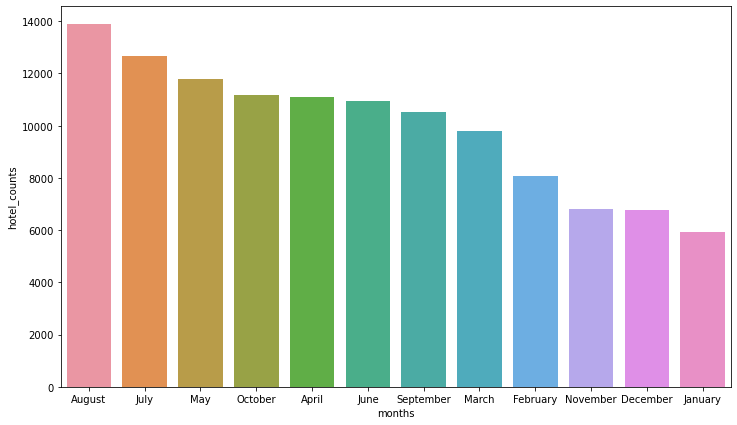

In [33]:
plt.figure(figsize=(12,7))
sns.barplot(x='months',y='hotel_counts',data=mnt_hotel)
plt.show()

#### July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

### Which Distribution channel is mostly used for hotel bookings?

In [34]:
distribution_channel=data['distribution_channel'].value_counts().reset_index(name='counts')
distribution_channel=distribution_channel.rename(columns={'index':'distribution_channel'})
distribution_channel

,distribution_channel,counts
0,TA/TO,97868
1,Direct,14645
2,Corporate,6676
3,GDS,193
4,Undefined,5


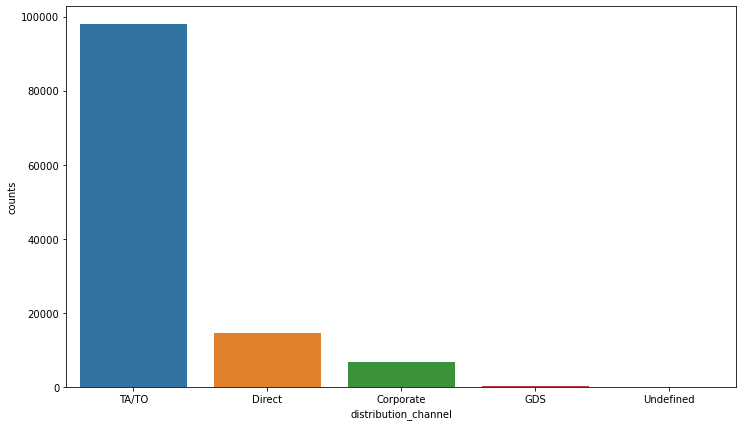

In [35]:
plt.figure(figsize=(12,7))
sns.barplot(x='distribution_channel',y='counts',data=distribution_channel)
plt.show()

**TA/TO' is mostly used for booking hoetls.**

### Which year had the highest bookings?

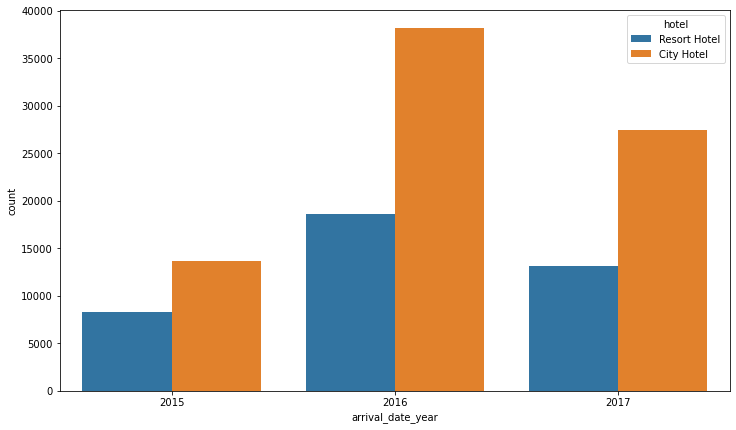

In [36]:
plt.figure(figsize=(12,7))
sns.countplot(x='arrival_date_year',data=data,hue='hotel')
plt.show()

<AxesSubplot:ylabel='arrival_date_year'>

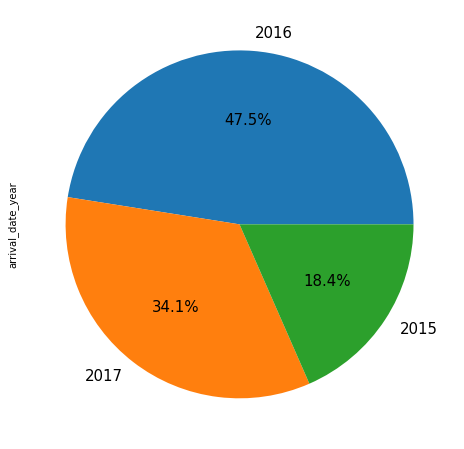

In [37]:
label=data['arrival_date_year'].value_counts().index
data['arrival_date_year'].value_counts().plot.pie( autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=label)

**2016 had the higest bookings.**

**2015 had less bookings.**

**overall City hotels had the most of the bookings.**

### Which Hotel type has the highest ADR?

In [38]:
hotel_adr=data.groupby('hotel')['adr'].count().reset_index(name='counts')

#### City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

### Which hotel type has the more lead time?

In [39]:
hotel_lead=data.groupby('hotel')['lead_time'].mean().reset_index()
hotel_lead

,hotel,lead_time
0,City Hotel,109.738050
1,Resort Hotel,92.677975


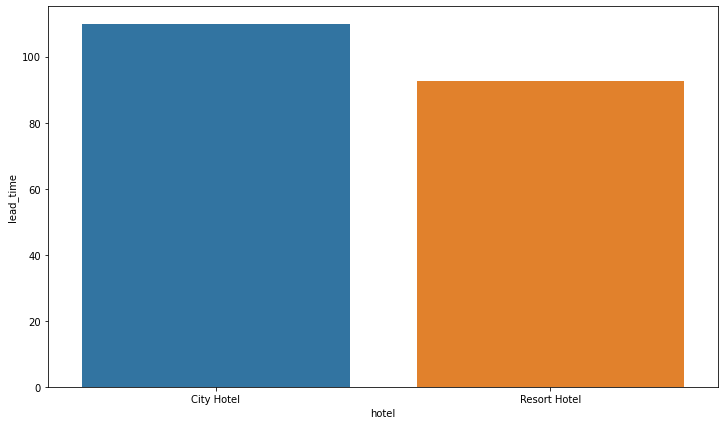

In [40]:
plt.figure(figsize=(12,7))
sns.barplot(x='hotel',y='lead_time',data=hotel_lead)
plt.show()

### Resort hotels has slightly high avg lead time. That means customers plan their trips very early.

### Which hotel has highest percentage of booking cancellation?

In [41]:
data.groupby('is_canceled')['hotel'].value_counts()


is_canceled  hotel       
0            City Hotel      46227
             Resort Hotel    28937
1            City Hotel      33101
             Resort Hotel    11122
Name: hotel, dtype: int64

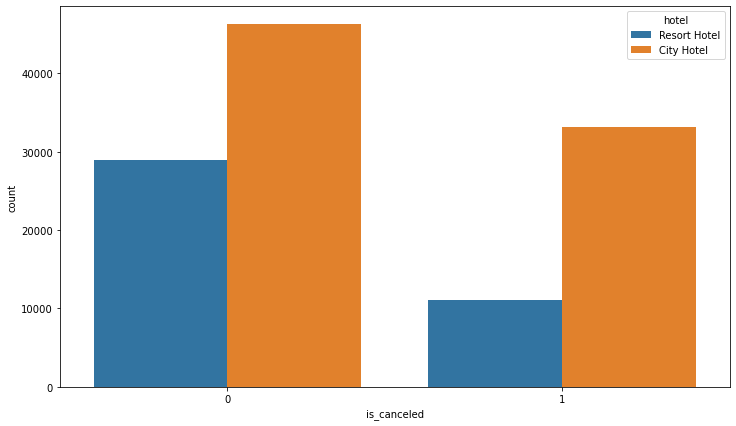

In [42]:
plt.figure(figsize=(12,7))
sns.countplot(x='is_canceled',data=data,hue='hotel')
plt.show()

**For the Resort Hotel, total of  11122 Bookings were cancelled**

**For the City Hotel, total of 33101 Bookings were cancelled**

#### Which hotel has longer waiting time?

In [43]:
waiting=data.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
waiting

,hotel,days_in_waiting_list
0,City Hotel,3.226856
1,Resort Hotel,0.527772


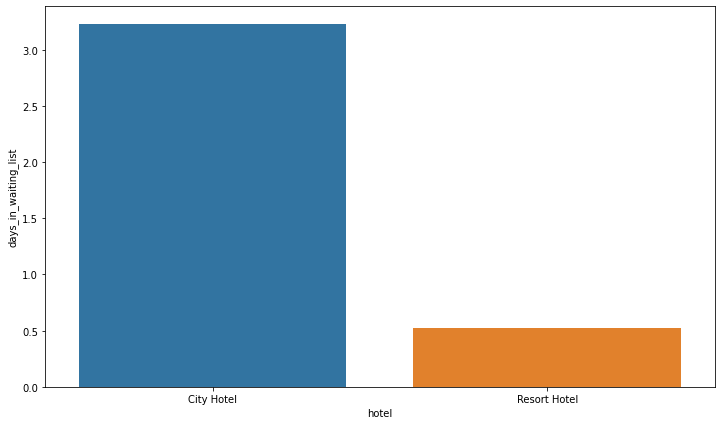

In [44]:
plt.figure(figsize=(12,7))
sns.barplot(x='hotel',y='days_in_waiting_list',data=waiting)
plt.show()

#### So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

#### Which Hotels has the most repeated guests?

In [45]:
data.groupby('is_repeated_guest')['hotel'].value_counts()


is_repeated_guest  hotel       
0                  City Hotel      77296
                   Resort Hotel    38282
1                  City Hotel       2032
                   Resort Hotel     1777
Name: hotel, dtype: int64

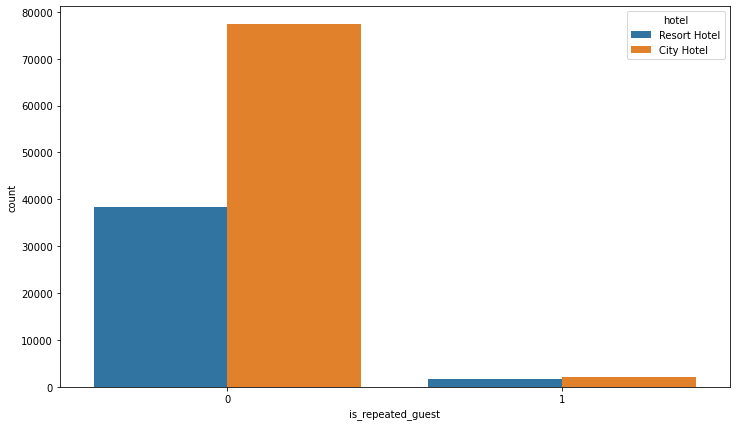

In [46]:
plt.figure(figsize=(12,7))
sns.countplot(x='is_repeated_guest',data=data,hue='hotel')
plt.show()

####  City Hotel has slightly more repeated guests than the Resort Hotels. It is almost similar for both hotels.

#### The relation between month adr vs hotel 

In [47]:
month_booking=data.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_booking['arrival_date_month']=pd.Categorical(month_booking['arrival_date_month'],categories=months,ordered=True)
month_booking=month_booking.sort_values('arrival_date_month')
month_booking

,arrival_date_month,hotel,adr
8,January,City Hotel,82.628986
9,January,Resort Hotel,49.461883
6,February,City Hotel,85.088278
7,February,Resort Hotel,55.171930
15,March,Resort Hotel,57.520147
14,March,City Hotel,91.821162
0,April,City Hotel,111.251838
1,April,Resort Hotel,77.849496
17,May,Resort Hotel,78.758134
16,May,City Hotel,121.591378


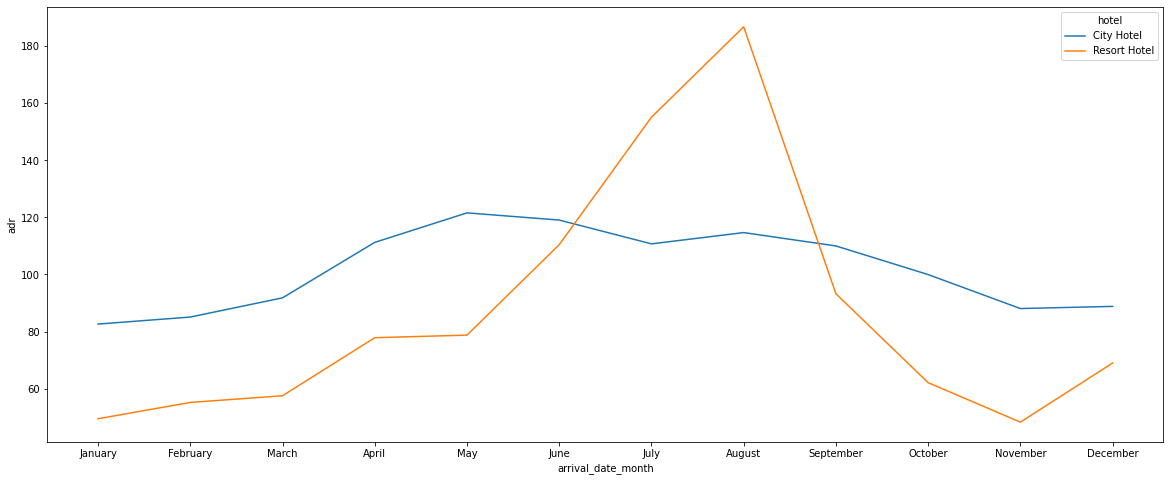

In [48]:
plt.figure(figsize=(20,8))
sns.lineplot(x=month_booking['arrival_date_month'],y=month_booking['adr'],hue=month_booking['hotel'])
plt.show()

For Resrot hotel is ADR is high in the months June,July,August as compared to City Hotels. May be Customers/People wants to spend their Summer vaccation in Resorts Hotels.

The best time for guests to visit Resort or City hotels is January, February, March, April,October, November and December as the avrage daily rate in this month is very low.

### Which Market Segment has the higest cancellation rate?

In [49]:
market_segment_df=data[data['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})  

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,52
1,Complementary,City Hotel,64
2,Complementary,Resort Hotel,33
3,Corporate,City Hotel,641
4,Corporate,Resort Hotel,351
5,Direct,City Hotel,1056
6,Direct,Resort Hotel,878
7,Groups,City Hotel,9623
8,Groups,Resort Hotel,2474
9,Offline TA/TO,City Hotel,7172


Text(0.5, 1.0, 'Cancellation Rate Vs market_segment')

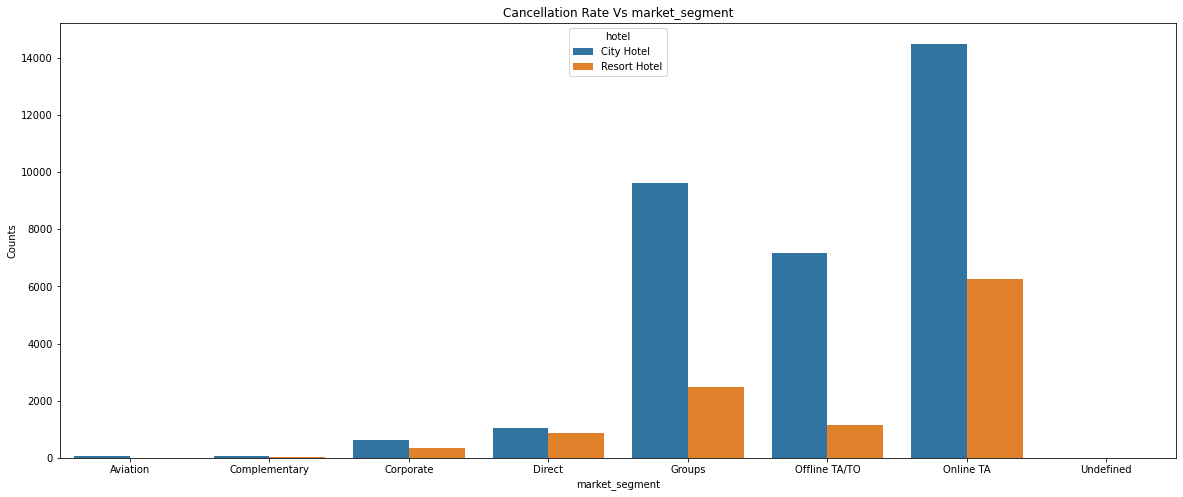

In [50]:
plt.figure(figsize=(20,8))
sns.barplot(x='market_segment',y='counts',hue="hotel",data= market_segment_df)

# set labels
plt.xlabel('market_segment')
plt.ylabel('Counts')
plt.title('Cancellation Rate Vs market_segment')

'Online T/A' has the highest cancellation in both type of cities
In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

<AxesSubplot:xlabel='total_people_stay', ylabel='adr'>

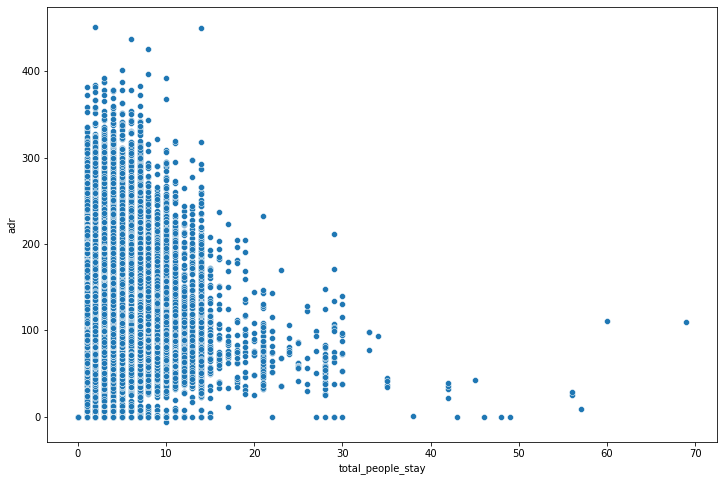

In [51]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='total_people_stay',y='adr',data=data)

#### From above scatter we can say that as the stay increases adr is decreasing. Thus for longer stays customer can get good adr.

#### What is the Optimal stay length in both types of hotels ?

In [52]:
ttl_stay=data.groupby(['total_people_stay','hotel'])['hotel'].count().reset_index(name='total_count').sort_values(ascending=False,by='total_count')
ttl_stay

,total_people_stay,hotel,total_count
4,2,City Hotel,21426
6,3,City Hotel,21381
2,1,City Hotel,13270
8,4,City Hotel,12557
3,1,Resort Hotel,7747
15,7,Resort Hotel,6596
5,2,Resort Hotel,6217
7,3,Resort Hotel,5695
10,5,City Hotel,4997
9,4,Resort Hotel,4826


<AxesSubplot:xlabel='total_people_stay', ylabel='total_count'>

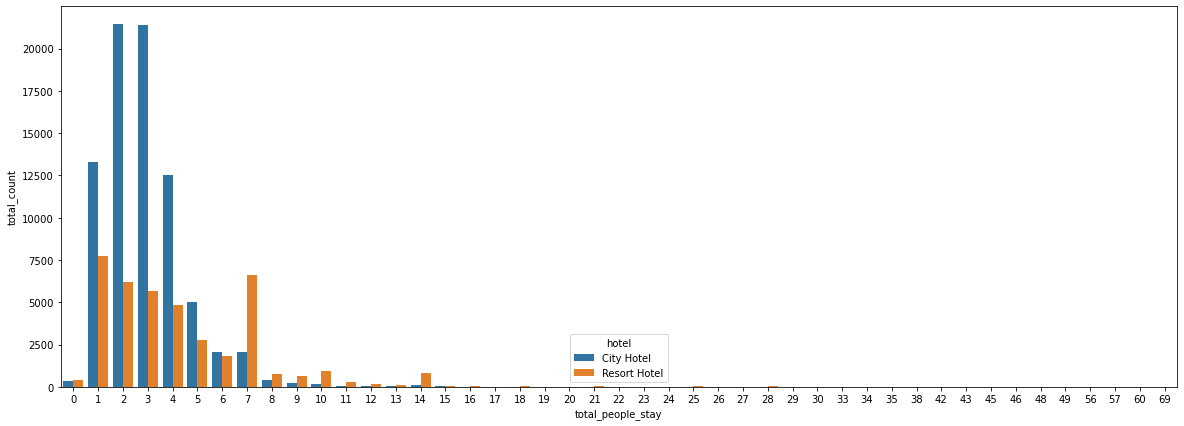

In [53]:
plt.figure(figsize=(20,7))
sns.barplot(x='total_people_stay',y='total_count',data=ttl_stay,hue='hotel')

**Optimal stay in both the type hotel is less than 7 days.**

## Conclusions:

**1) City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.**

**2) 37.5 % bookings were got cancelled out of all the bookings.**

**3) Only 3.2 % people were revisited the hotels. Rest 96.8 % were new guests. Thus retention rate is low.**

**4) The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.**

**5) Most of the customers (93.6%) do not require car parking spaces. only 6.4 requered single space parking**

**6) 82.1 % bookings were made through TA/TO (travel agents/Tour operators).**

**7) BB( Bed & Breakfast) is the most preferred type of meal by the guests.**

**8) Maximum number of guests were from Portugal, i.e. more than 48590 guests.**

**9) Most of the bookings for City hotels and Resort hotel were happened in 2016.**

**10) Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.**

**11) Booking cancellation rate is high for City hotels which almost 33101.**

**12) Average lead time for city hotel is high.**

**13) Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.**

**14) Resort hotels have the most repeated guests.**

**15) Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.**

**16) More than 47% bookings were made in 2016, 34% to the 2017 year. But the bookings decreased by almost 15.7% next year . .**